###  Task 1 : Exploratory Data Analysis (EDA) on Retail Sales Dataset

###### Name: Yogesh Kasar (Batch- Feb Phase 2)

#### Project Overview::
In this project, I analyzed a dataset containing information about retail sales. The main objective was to conduct exploratory data analysis (EDA) to discover patterns, trends, and insights. The ultimate goal is to provide valuable infomation that can assist the retail business in making well-informed decisions for business.

**Importing necessary libraries**

In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

**Data Loading and Cleaning**

In [2]:
#Load the dataset
retail_df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
#check the head of dataset
retail_df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [4]:
retail_df.tail(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
990,991,2023-12-26,CUST991,Female,34,Clothing,2,50,100
991,992,2023-08-21,CUST992,Female,57,Electronics,2,30,60
992,993,2023-02-06,CUST993,Female,48,Electronics,3,50,150
993,994,2023-12-18,CUST994,Female,51,Beauty,2,500,1000
994,995,2023-04-30,CUST995,Female,41,Clothing,1,30,30
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
#shape of the our dataset
print("The shape of our dataset: ",retail_df.shape)

The shape of our dataset:  (1000, 9)


Our dataset consist of 1000 rows and 9 columns, providing a comprehensive view of the retail sales data.

Now, explore our dataset first by getting more information about rows and column.

In [6]:
retail_df['Date'] = pd.to_datetime(retail_df['Date'])

In [7]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


This dataset contains **9** columns and in that **3 categorical**,**one is date time** and **5 numerical** correspond to:

1. ***Transaction ID:*** A unique identifier for each transaction, allowing tracking and refernce.
2. ***Date:*** The date when the transaction occured, providing insight into sales trends overtime.
3. ***Customer ID:*** A unique identifier for each customer, enablling customer-centric analysis.
4. ***Gender:*** The gender of the customer Male and Female, offering insights into gender-based purchasing patterns.
5. ***Age:*** The gender of the customer, facillilating segmentation and exploration of age-related influences.
6. ***Product Category:*** The category of the purchase product (e.g. Electronics, Clothing and Beauty), helping understand product prefernces.
7. ***Quantity:*** The number of units of the product, contributing to insights on purchase volumes.
8. ***Price per Unit:*** The price of the Unit of the products, aiding in calculations related to total spending.
9. ***Total Amount:*** The total monetary value of the transaction showcasing the financial impact of each purchase.

Now, explore the categorical columns and numerical columns.

In [8]:
#categorical columns
categorical_columns=[]
for column in retail_df.columns:
    if (retail_df[column].dtype=='object'):
        categorical_columns.append(column)
print("This is all categorical columns: ", categorical_columns)

This is all categorical columns:  ['Customer ID', 'Gender', 'Product Category']


In [9]:
#numerical columns
numerical_columns=[]
for column in retail_df.columns:
    if (retail_df[column].dtype!='object'):
        numerical_columns.append(column)
print("This is all numerical columns: ", numerical_columns)

This is all numerical columns:  ['Transaction ID', 'Date', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']


**Descriptive Statistics**

In [10]:
print("Calculate basic statistics mean, median, mode, standard deviation:")
retail_df.describe()

Calculate basic statistics mean, median, mode, standard deviation:


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Now, checking missing and duplicated values in each column.

In [11]:
#missing values
retail_df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [12]:
#duplicated values
print("Duplicated Value: ",retail_df.duplicated().sum())

Duplicated Value:  0


In this dataset zero duplicate or missing value

In [13]:
#exploring the unique values of each column  
print("Unique values of each column: ")
retail_df.nunique()

Unique values of each column: 


Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

Cretae a new  month column and Age Group column

In [14]:
retail_df['Month'] = retail_df['Date'].dt.month_name()
retail_df['Month'].head()

0    November
1    February
2     January
3         May
4         May
Name: Month, dtype: object

In [15]:
# create a age group column
age_bins = [0, 18, 25, 35, 50, 100]
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']
retail_df['Age Group'] = pd.cut(retail_df['Age'], bins = age_bins, labels=age_group)
print("The added new column in retail data: ")
retail_df.head()

The added new column in retail data: 


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,26-35


Transaction ID counts per month

In [16]:
retail_df['Month'] = retail_df['Date'].dt.month
transaction_count = retail_df.groupby('Month')['Transaction ID'].count()

In [17]:
print("Transaction ID counts per month: ",transaction_count)

Transaction ID counts per month:  Month
1      78
2      85
3      73
4      86
5     105
6      77
7      72
8      94
9      65
10     96
11     78
12     91
Name: Transaction ID, dtype: int64


**Time Series Analysis: Analyze sales trends over time using time series techniques.**


Monthly Sales Trends Over Time

In [18]:
retail_df['Date'] = pd.to_datetime(retail_df['Date'])
monthly_sales = retail_df.resample('M', on='Date')['Total Amount'].sum()
print("Monthly Sales: ",monthly_sales)

Monthly Sales:  Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: M, Name: Total Amount, dtype: int64


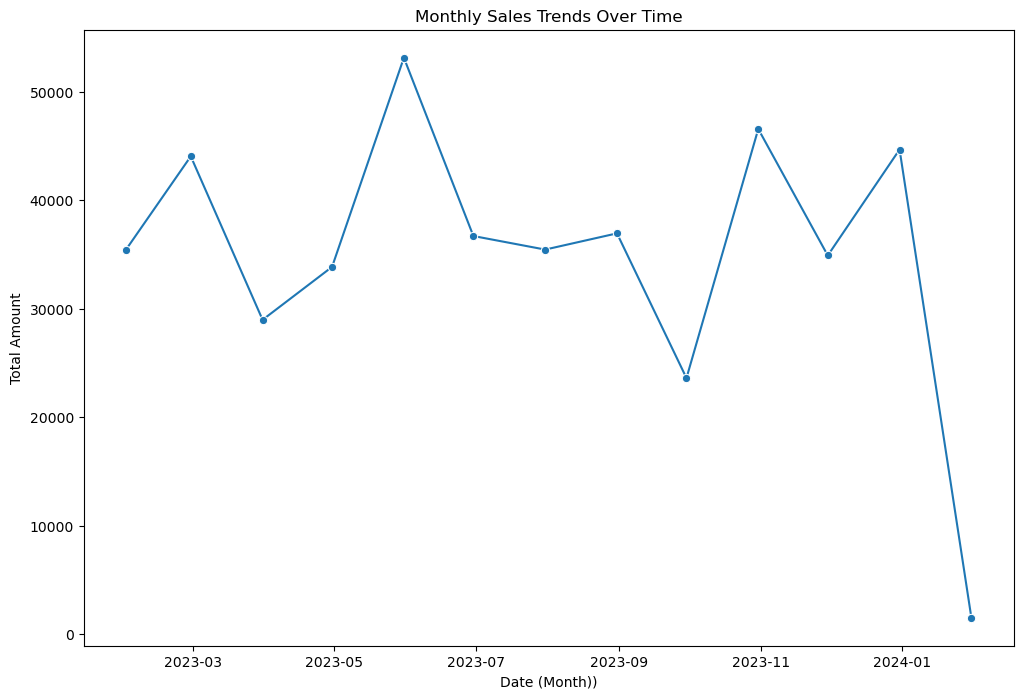

In [19]:
#showing the Monthly Sales Trends Over Time
plt.figure(figsize=(12, 8))
ax=sns.lineplot(x=monthly_sales.index, y=monthly_sales.values,marker='o')
for p in ax.patches:
    ax.annotate(f'{(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Date (Month))')
plt.ylabel('Total Amount')
plt.show()

In [20]:
retail_df['Date'] = pd.to_datetime(retail_df['Date'])
retail_df['Month'] = retail_df['Date'].dt.month
monthly_counts1= retail_df.groupby('Month')['Total Amount'].count()
percentage_increase1 = monthly_counts1.pct_change() * 100
overall_percentage_increase1 = (monthly_counts1.iloc[-1] - monthly_counts1.iloc[0]) / monthly_counts1.iloc[0] * 100
print("Overall percentage increase in Sales: {:.2f}%".format(overall_percentage_increase1))


Overall percentage increase in Sales: 16.67%


As we can see, **May** and **October** are the high selling months. 


Transaction Frequency Over time

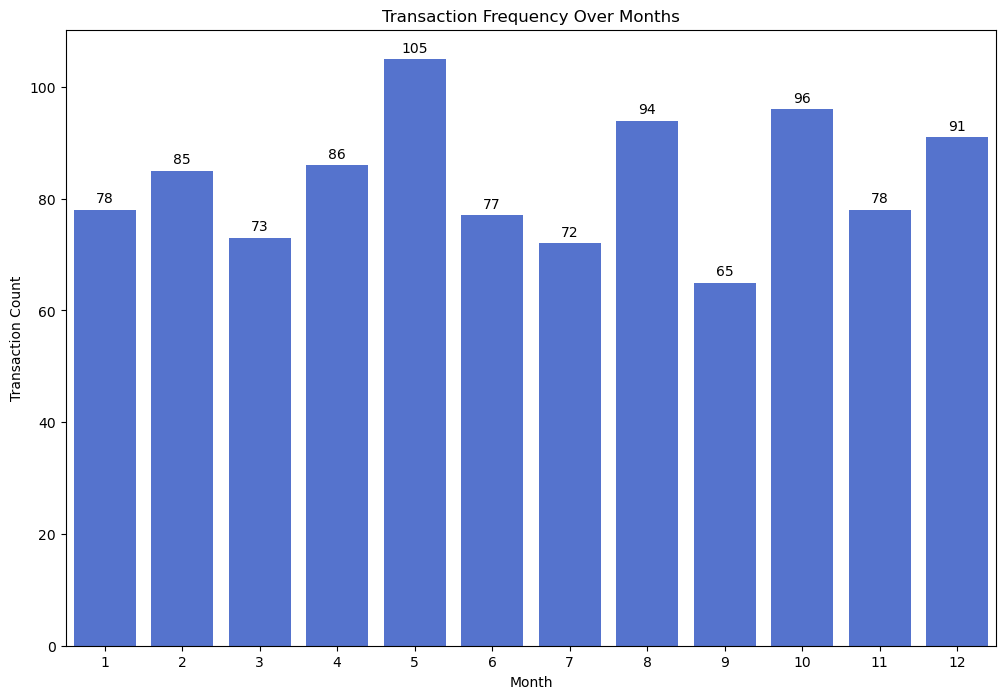

In [21]:
#showing the Transaction Frequency Over time
plt.figure(figsize=(12,8))
ax=sns.barplot(x=transaction_count.index, y=transaction_count.values,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

As we can see, **May** and **October** are the high transaction frequency over months.

Customer retention over time

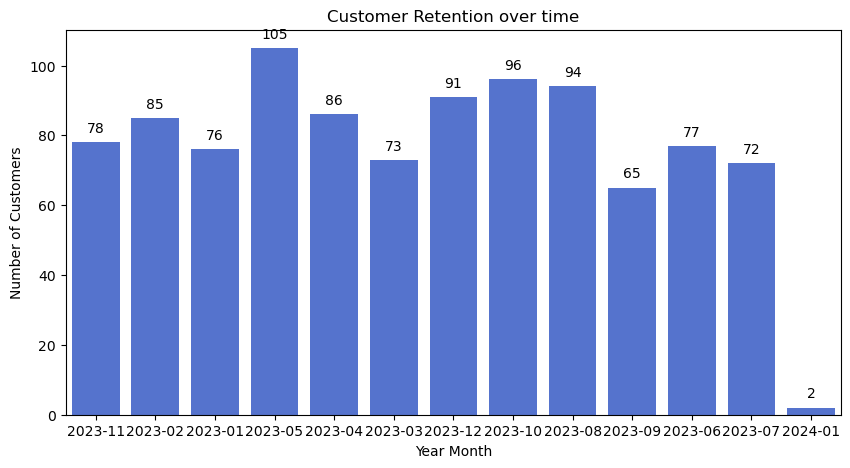

In [22]:
#showing the customer retention over time
cust_retention=retail_df.groupby('Customer ID')['Date'].min().reset_index()
cust_retention['Year Month'] = cust_retention['Date'].dt.to_period('M')
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Year Month', data= cust_retention,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.title('Customer Retention over time')
plt.xlabel('Year Month')
plt.ylabel('Number of Customers')
plt.show()

we can conclude that, **May** and **October** are the high selling, transaction frequency and customer retention rate months, which indicates high sales during the summer and holiday season. Consider allocating additional resources and inventory during this period to meet increased demand.


**Customer and Product Analysis:**

Customer Demographics:

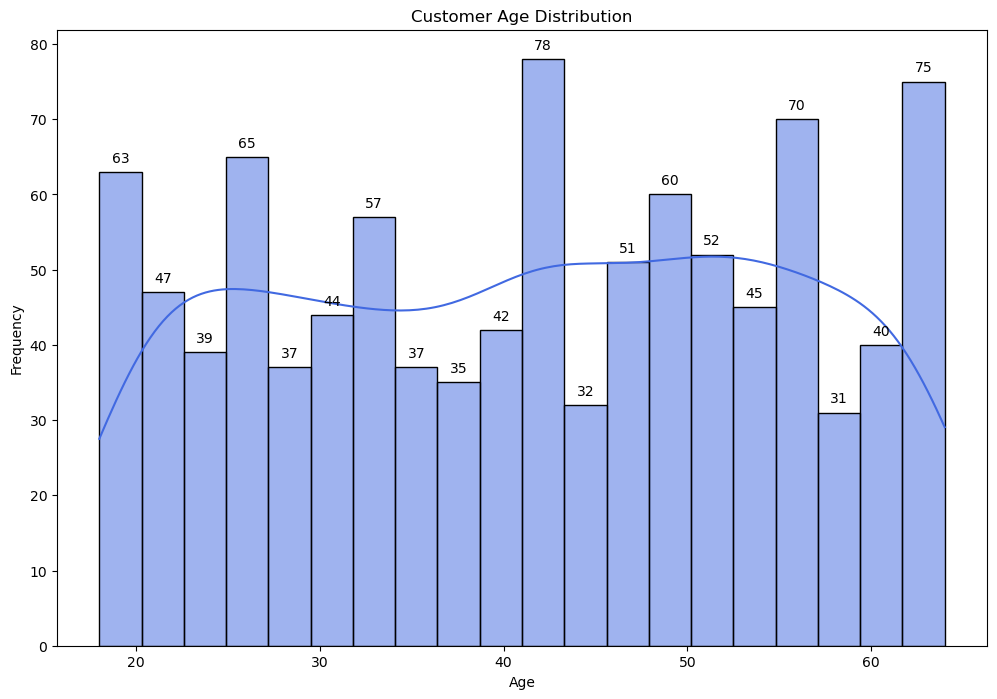

Gender Distribution:
 Female    510
Male      490
Name: Gender, dtype: int64


In [23]:
# Visualizing Customer Age Distribution
plt.figure(figsize=(12,8))
ax=sns.histplot(retail_df['Age'], bins=20, kde=True,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
gender_distribution = retail_df['Gender'].value_counts()
print("Gender Distribution:\n", gender_distribution)

Now as we can see that, this histogram chart displays the highest central tendency in customers ages 40 to 60.

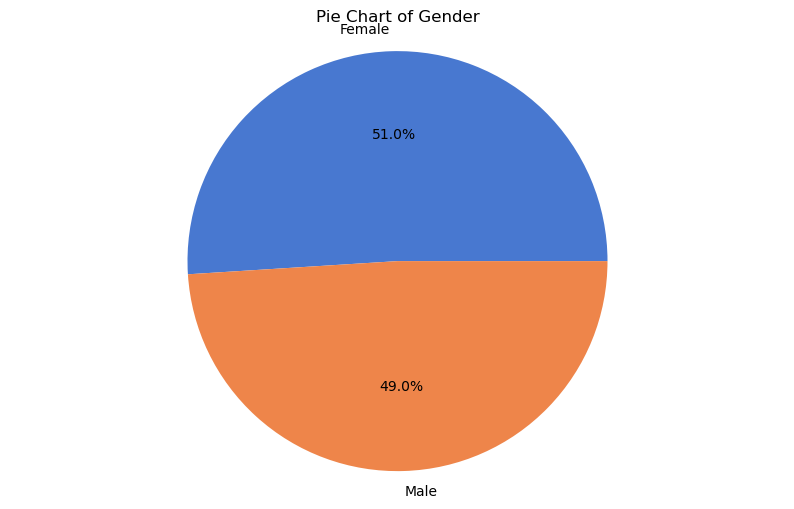

In [24]:
## Creating a pie chart to show the distribution of Gender
col = 'Gender'
i = retail_df[col].value_counts().index
v = retail_df[col].value_counts().values
colors = sns.color_palette('muted')
plt.figure(figsize=(10, 6))
plt.pie(v, labels=i, autopct='%1.1f%%', colors=colors)
plt.title(f"Pie Chart of {col}")
plt.axis('equal') 
plt.show()

Now we can see that, this pie chart indicates a relatively balanced gender distribution, with females constituting **51.0%** and males **49.0%**. This balance suggests that the retail customer base is diverse in terms of gender.

Average Total Amount by Gender

In [25]:
average_total_amount_by_gender = retail_df.groupby('Gender')['Total Amount'].mean()
print("Average Total Amount by Gender:\n", average_total_amount_by_gender)

Average Total Amount by Gender:
 Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


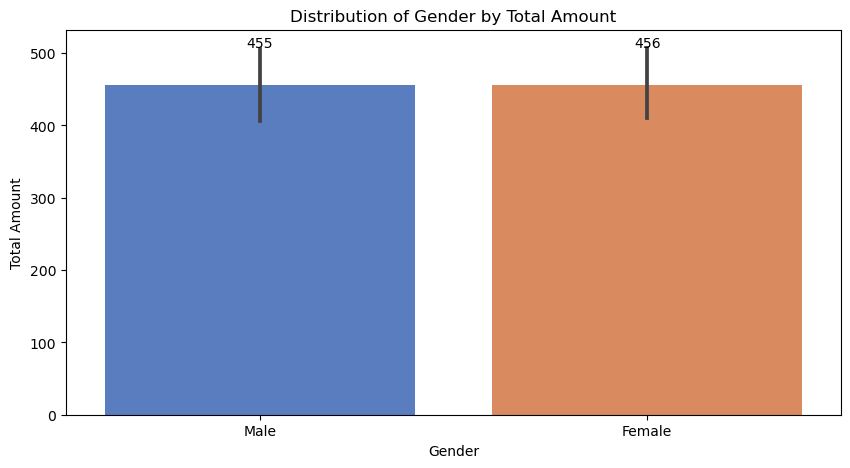

In [26]:
#Show the bar plot Distribution of Gender by Total Amount
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Gender', y='Total Amount',data=retail_df, palette='muted', dodge=True)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,30), textcoords='offset points')
plt.title('Distribution of Gender by Total Amount')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()


Customer Age Distribution using Age Group

In [27]:
Age_Group_distribution = retail_df['Age Group'].value_counts()
print("Gender Distribution:\n", Age_Group_distribution)

Gender Distribution:
 36-50    313
50+      313
26-35    205
19-25    148
0-18      21
Name: Age Group, dtype: int64


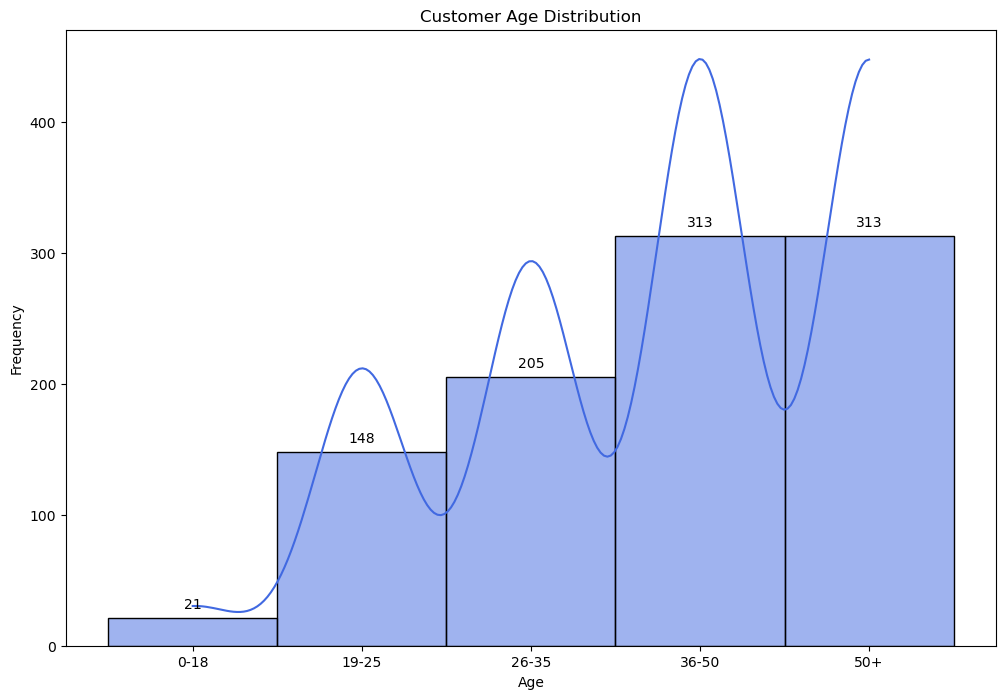

In [28]:
# Customer Age Distribution using Age Group
plt.figure(figsize=(12,8))
ax=sns.histplot(retail_df['Age Group'], bins=20, kde=True,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Now we can see that, in this chart highest frequency of customers falls into the 36-50 and 50+ age groups, both with **313** customer and 0-18 age group has the lowest frequency, comprising only **21** customers.

**Purchasing Behavior:**

Analyze purchasing behavior, such as popular products and categories.

In [29]:
# Product sales analysis
product_sales = retail_df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("Product Sales:\n", product_sales)

Product Sales:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


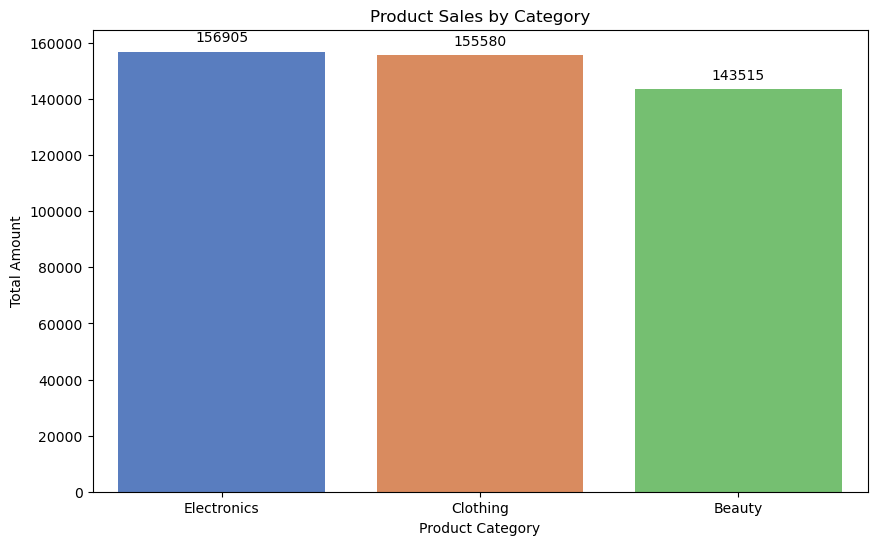

In [30]:
# Bar chart of product sales by category
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=product_sales.index, y=product_sales.values,palette='muted')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.title('Product Sales by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

Now in this we can see that, the Electronics category as the hights category with total sales amounting to **159,905**, and then followed by Clothing category with **155,588** sales amounts. These two categories stand out as the dominant contributors to overall sales. Beauty products is loweast behind with the hightest sales, totaling **143,515**.  This indicates an opportunity for improvement and suggests that the Beauty category may require additional attention to boost sales.

In [31]:
# Average product sales analysis
average_sales = retail_df.groupby('Product Category')['Total Amount'].mean()
print("Average Total Amount by Product Category:\n", average_sales)

Average Total Amount by Product Category:
 Product Category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: Total Amount, dtype: float64


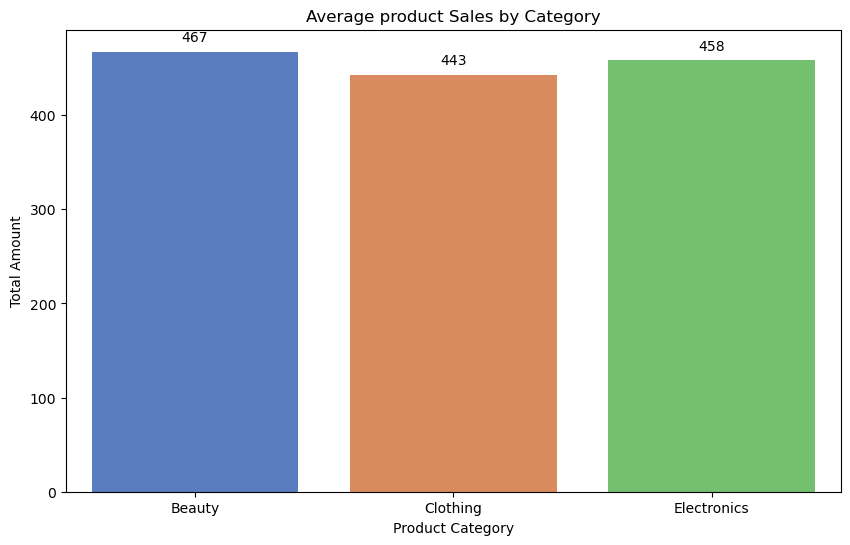

In [32]:
# Bar chart of average product sales by category
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=average_sales.index, y=average_sales.values,palette='muted')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.title('Average product Sales by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

Now in this we can see that, the Beauaty category as the highest category with average sales amounting to **467**, and then followed by Electronics category with **458** units solds. Clothing category is loweast behind with the hightest sales, totaling **443** units solds

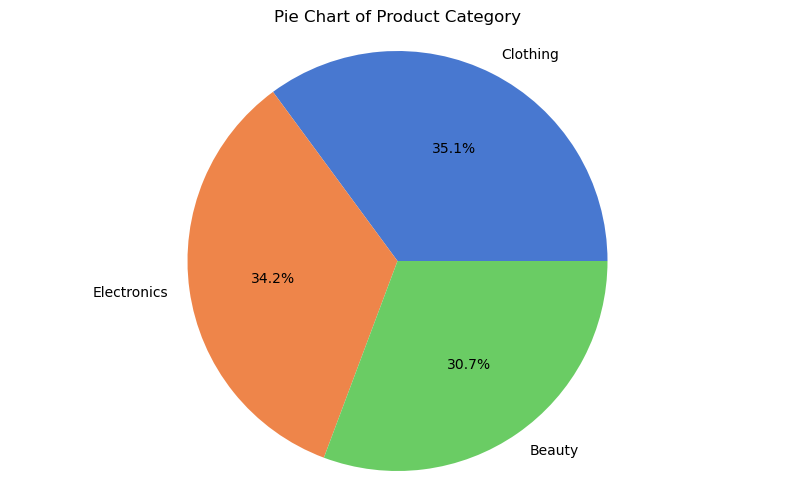

In [33]:
# show pie chart th sales Of different Product Categories
col = 'Product Category'
i = retail_df[col].value_counts().index
v = retail_df[col].value_counts().values
colors = sns.color_palette('muted')
plt.figure(figsize=(10, 6))
plt.pie(v, labels=i, autopct='%1.1f%%', colors=colors)
plt.title(f"Pie Chart of {col}")
plt.axis('equal') 
plt.show()

Product Category Quantity Analysis

In [34]:
# Average Product Category Quantity Analysis
average_Quantity = retail_df.groupby('Product Category')['Quantity'].mean()
print("Average Product Category Quantity Analysis:\n", average_sales)

Average Product Category Quantity Analysis:
 Product Category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: Total Amount, dtype: float64


In [35]:
# Product Quantity Analysis
product_quantity = retail_df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
print("Product Sales quantity:\n", product_quantity)

Product Sales quantity:
 Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


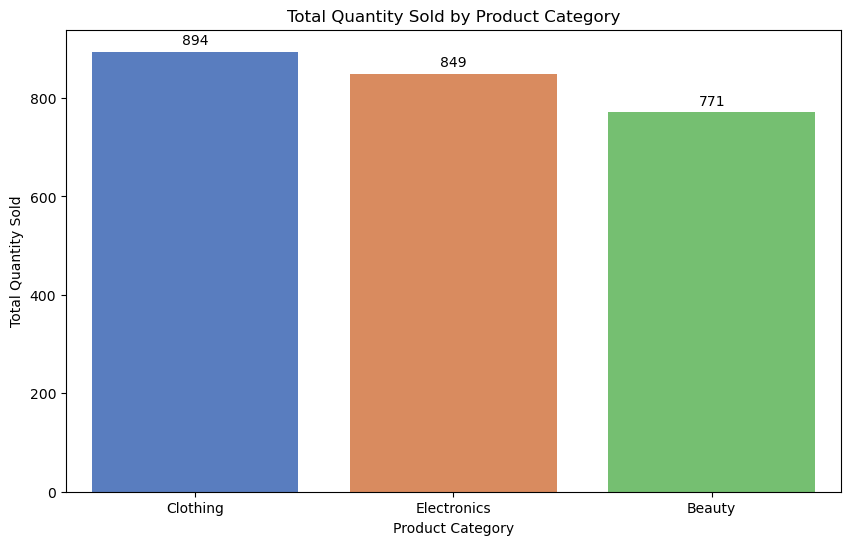

In [36]:
# # Bar chart of Product Sales Quantity by Category
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=product_quantity.index, y=product_quantity.values,palette='muted')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,8), textcoords='offset points')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()

Now in this we can see that, the Clothing category as the highest category with quantity solding to **894**, and then followed by Electronics category with **849** units solds. Clothing category is loweast behind with the hightest sales, totaling **443** units solds

Analyzing Customer Spending Behaviour by diffrent Age Group

In [37]:
# Calculate the total amount for each age group
total_amount_Age_Group = retail_df.groupby('Age Group')['Total Amount'].sum().sort_values(ascending=False)
print("Total Sales Amount by Age Group:\n", total_amount_Age_Group)

Total Sales Amount by Age Group:
 Age Group
36-50    139660
50+      133310
26-35     98480
19-25     73335
0-18      11215
Name: Total Amount, dtype: int64


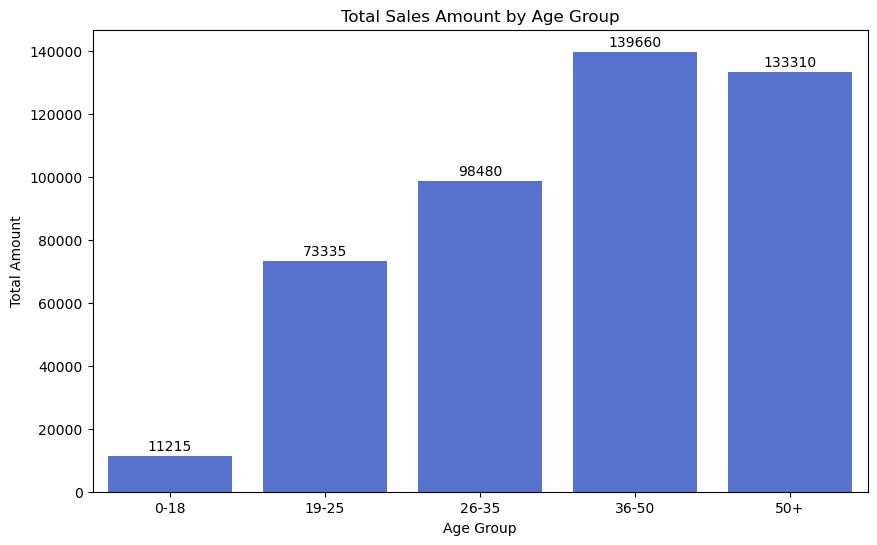

In [38]:
#Bar chart of Total Sales Amount by Age Group
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=total_amount_Age_Group.index, y=total_amount_Age_Group.values,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,7), textcoords='offset points')
plt.title('Total Sales Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

Now in this we can see that, the 36-50 age group as the highest group with sales amounting to **139660**, and then followed by 50+ age group with **133310** and loweast sales amounting is 0-18 age group is **111215.**

In [39]:
## Calculate the total quantity sold for each age group
age_group_quantity = retail_df.groupby('Age Group')['Quantity'].sum().sort_values(ascending=False)
print("Total quantity sold for each age group:\n", age_group_quantity)

Total quantity sold for each age group:
 Age Group
36-50    785
50+      777
26-35    540
19-25    358
0-18      54
Name: Quantity, dtype: int64


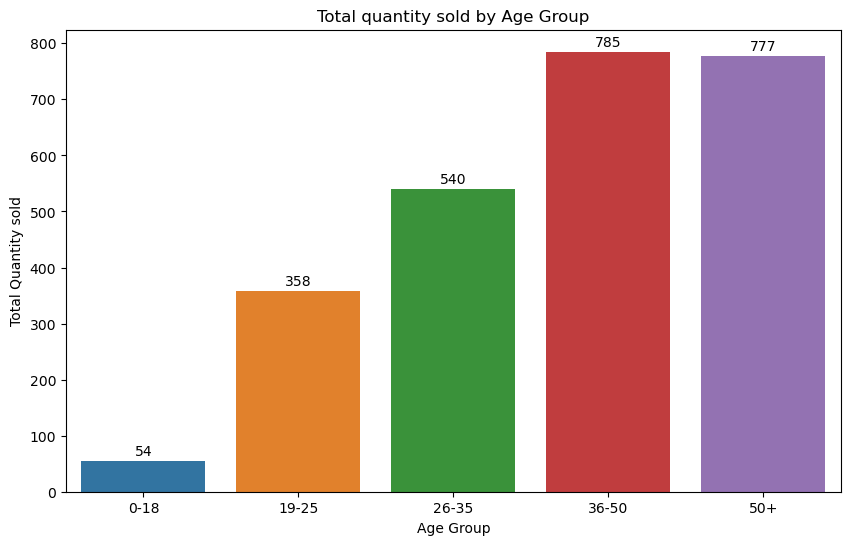

In [40]:
#Bar chart of Total quantity sold by Age Group
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=age_group_quantity.index, y=age_group_quantity.values)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,7), textcoords='offset points')
plt.title('Total quantity sold by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity sold')
plt.show()

Now in this we can see that, the 36-50 age group as the highest group with total quantity solding to **785**units and then followed by 50+ age group with **777**units, and loweast sales amounting is 0-18 age group is **54**units.

**Showing the heatmap anlyzed sales of product categories per month**

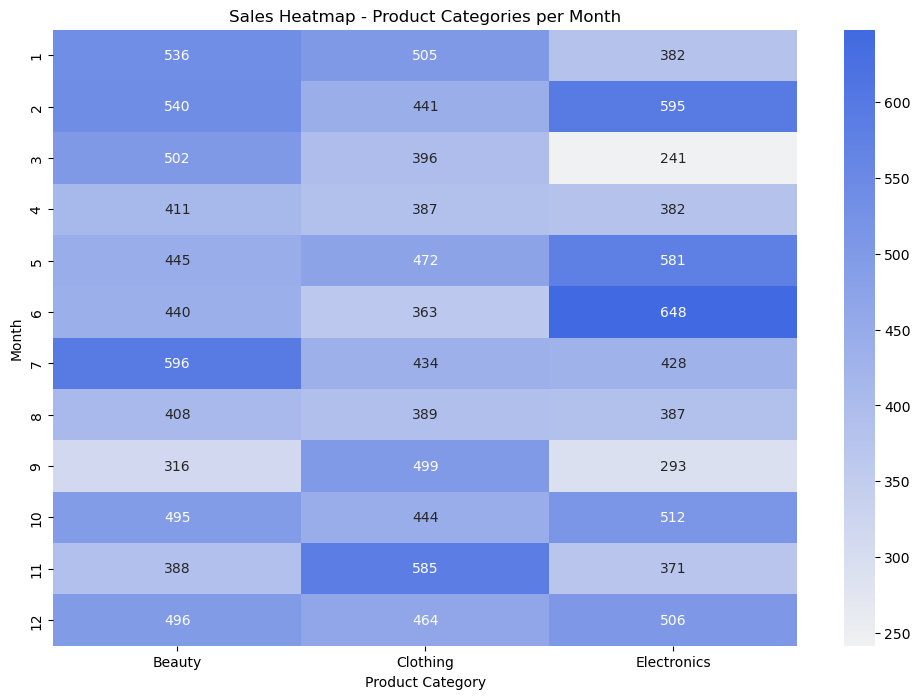

In [41]:
#showing a heatmap to analyze sales of product categories per month
plt.figure(figsize=(12,8))
heatmap = retail_df.pivot_table(index='Month',columns='Product Category', values='Total Amount')
custom_cmap = sns.light_palette('royalblue', as_cmap=True)
sns.heatmap(heatmap, annot=True, fmt='.0f',cmap=custom_cmap)
plt.title('Sales Heatmap - Product Categories per Month')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

**Recommendations:**

- The allocate additional resources during May and October, as they show high sales, transaction frequency, and customer retention rates. This aligns with the summer and holiday seasons, indicating increased demand.
- The focus is on maintaining and potentially increasing resources for electronics and clothing categories, given their dominant contribution to overall sales. and recognize the opportunity for improvement in the Beauty category. Consider additional attention, promotions, or marketing strategies to boost sales.
- Evaluate pricing and promotions for the Beauty category, considering the lower average sales compared to Electronics and Clothing. Adjust pricing or introduce targeted promotions to increase attractiveness.
- Acknowledge that while Clothing has the highest quantity sold, the average sales per unit are lower than Electronics and Beauty. Consider strategies to enhance the average transaction value in the Clothing category.
- Given the highest sales, focus on retaining and expanding the customer base within this age group. Introduce products or marketing campaigns that specifically appeal to this demographic.
- Use sales and quantity data to optimize inventory management. Ensure that stock levels are aligned with the demand trends observed in the analysis.
